## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [40]:
#Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read in data set
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#View the number of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#View the number fo unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#Calculate the number of users who have converted
df['converted'].sum()/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Calculate the number of times that new_page and treatment do not match
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [7]:
#View dataframe info to see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Drop any rows where treatment does not match new_page or control doesn't match old_page
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#View the numbber of unique users in the new dataframe
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#View duplicate user
dupes = df2[df2['user_id'].duplicated()]
dupes

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
#Find all instances of duplucated user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Remove the second instance of duplicate user_id
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)

In [14]:
#View all instances of the previously duplicated user_id to ensure there is only one current instance
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#Calculate probability of individual converting overall
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#Calculate the probability of an individual in the control group converting
converted_control = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_users =float(df2.query('group == "control"')['user_id'].nunique())
converted_control /control_users

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#Calculate the probability of an individual in the treatment group converting
converted_treat = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treat_users =float(df2.query('group == "treatment"')['user_id'].nunique())
converted_treat /treat_users

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#Calculate the probability that an individual recieved the new page
new = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
new/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<b>There is very little difference between the number of users converted using the old page versus the number of users converted using the new page.  Given that the difference is less than 1%, I see little evidence that the new treatment page leads to more conversions.</b>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \geq 0$$
$$H_1: p_{new} - p_{old} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
#Calculate the "new" converted success rate per the above directions
p_new = (df2.query('converted == 1')['user_id'].nunique())/(df2['user_id'].nunique())
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Calculate the "old" converted success rate per the above directions
p_old = (df2.query('converted == 1')['user_id'].nunique())/(df2['user_id'].nunique())
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
#Calculate the number of individuals in the treatment group
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
#Calculate the number of individuals in the control group
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#Simulate transactions for "new" conversion rate
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 0, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#Simulate transactions for "old" conversion rate
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
#Subtract the mean of "old" transactions from the mean of "new" transactions
new_page_converted.mean() - old_page_converted.mean()

-0.0038042116635714773

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
#Create bootstrap sample data of 10,000 instances to get a large number of new and old transactions
p_diffs = []
size = df2.shape[0]
p_new = (df2.query('converted == 1')['user_id'].nunique())/(df2['user_id'].nunique())
p_old = (df2.query('converted == 1')['user_id'].nunique())/(df2['user_id'].nunique())
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_old = df2.query('group == "control"')['user_id'].nunique()

for i in range(10000):
    sample = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [ ]:
#Plot histogram od p_diffs sample set
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#Create new dataframe with only individuals who were shown the new page
new_df = df2.query('landing_page == "new_page"')

#Calculate the actual convert rate for the new page from cleaned dataset df2
original_new_convert = new_df.query('converted == 1').user_id.nunique() / n_new

#Display the actual convert rate for the new page
original_new_convert

0.11880806551510564

In [29]:
#Create new dataframe with only individuals who were shown the old page
old_df = df2.query('landing_page == "old_page"')

#Calculate the actual convert rate for the new page from cleaned dataset df2
original_old_convert = old_df.query('converted == 1').user_id.nunique() / n_old

#Display the actual convert rate for the new page
original_old_convert

0.1203863045004612

In [30]:
#Calculate observed difference in click through rates for each page type from the original data set df2
obs_diff = original_new_convert - original_old_convert

#Display observed difference
obs_diff

-0.0015782389853555567

In [31]:
#Convert p_diffs to numpy array
p_diffs = np.array(p_diffs)

# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(),p_diffs.size)

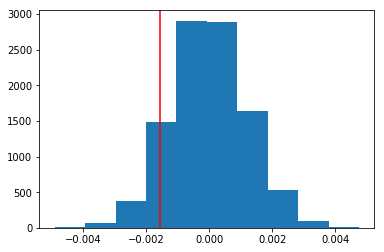

In [95]:
# Plot observed statistic with the null distribution
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [33]:
#Calculate the proportion of the p_diffs (p-value) that are greater than the actual difference observed in ab_data.csv from question j.
(null_vals > obs_diff).mean()

0.90990000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<b>The p-value which was calculated in part j is .912 and is greater than the 5% Type I error rate (or .05) and would not be considered statistically significant, therefore there is not enough evidence to reject the null hypothesis.  This means that we have no evidence that the new page outperforms the older website page, and the old page is actually converting better. </b>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
#Import statsmodel library to perform regression analysis
import statsmodels.api as sm

#Create variables for conversion rates and number of rows
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
n_old = df2.query('group == "control"')['user_id'].nunique()
n_new = df2.query('group == "treatment"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

print("z-score: ",z_score, "     p-value: ", p_value)

z-score:  -1.31092419842      p-value:  0.905058312759


In [42]:
#Import function
from scipy.stats import norm

# Define probability (95% since our alpha value is 5%)
p = 0.95  

# Calculate critical value greater than or equal to probability 
cval = norm.ppf(p)

#Display critical value
cval

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<b>The calculated z-score tells us that the mean difference between the new and old pages falls 1.31 standard deviations below the mean data point.  The critical value for a 95% confidence interval is 1.64.  In order to be statistically significant, the z-score would need to be above the critical value.  Meanwhile, the p-value of .905 is above the alpha value of .05, which also says that our observed value is not statistically significant.  The new calculations reinforce our earlier conclusions that the new page is being outperformed by the old page, and therefore there is no evidence to reject the null hypothesis.</b>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<b>Since we are looking to predict between two possible outcomes, logistical regression should be performed. </b>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
#Create intercept
df2['intercept'] = 1

#Create dummies column which will display 1 if treatment and 0 if control.  Then Display the head to ensure new columns were added.
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [49]:
#Create regression model
con_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

#Fit model
results = con_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
#Display summary of model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-14 01:09 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<b>The p-value associated with the ab_page in the regression model is .190, which is different from the p-value that was calculated during Part II of .905.  This is because the null and alternative hypothesis of the original test differs from the null and alternative hypothesis of the regression model.  In Part II were to believe that the old page performed better unless the new page proved that it converted better with 95% certainty.  In Part III our null hypothesis is that the ab_page does not affect the conversion rate, while the alternative is that that variable does affect the conversion rate.  The low p-value shows that there is some statistical significance to this column. </b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<b>Other factors could influence whether the individual converts.  Time of day, whether the individual is alone, and whether the individual is interested in the types of services offered by the website are all possible reasons why a click on a website might not convert.  Some of these factors would be difficult to capture.  A disadvantage of adding additional variables to a regression model is that it can make the results more difficult to interpret in order to make a decision.</b>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [83]:
#Read countries.csv into new dataframe and view head
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
#Join countries dataframe with df2 and view head
df3 = df2.merge(countries, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [85]:
#View values of all countries
df3['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [86]:
#Create dummy variables for countries and view head
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [87]:
#Drop US column
df3 = df3.drop(df3['US'])

In [88]:
#Create intercept column
df3['intercept'] = 1

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0


In [93]:
#Create logistical regression model for converted and country, using US as baseline
con_model2 = sm.Logit(df3['converted'], df3[['intercept', 'CA','UK']])

#Fit the new regression model
results2 = con_model2.fit()

#Display summary
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-14 02:04 AIC:              212780.3241
No. Observations:   290582           BIC:              212812.0630
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3127  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5182  0.1290  -0.0935   0.0119
UK            0.0099    0.0133     0.7450  0.4563  -0.0162   0.0360
==================================================================

"""

<b>The p-values of the countries are all greater than our .05 alpha threshold, therefore we do not have evidence to reject the null hypothesis and country has no effect on conversion.</b>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [94]:
#Create logistical regression model for converted and country, using US as baseline
con_model3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA','UK']])

#Fit the new regression model
results3 = con_model3.fit()

#Display summary
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-14 02:13 AIC:              212780.6124
No. Observations:   290582           BIC:              212822.9310
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7602  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3083  0.1908  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5165  0.1294  -0.0935   0.0119
UK            0.0099    0.0133     0.7425  0.4578  -0.0162   0.0359
==================================================================

"""

<b>Again the p-values of the countries based on page are all greater than our .05 alpha threshold, therefore we do not have evidence to reject the null hypothesis and country and page shown has no effect on conversion.</b>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0